# Import dependencies

In [49]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# Load & prepare data

In [37]:
vec_embeddings_data = pd.DataFrame()

for inx in tqdm(range(4282)):
    embeddings_data = pd.read_csv(f"D:/documents/lambda_calc_data/embeddings_4k/term_embeddings_{inx}.csv").drop(columns=['Unnamed: 0'])
    vec_embeddings_data = pd.concat([
        vec_embeddings_data, 
        pd.DataFrame({param_no: [mean_embed, ] for param_no, mean_embed in enumerate(embeddings_data.mean())})
    ])

100%|██████████| 4282/4282 [04:03<00:00, 17.60it/s]


In [38]:
vec_embeddings_data.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.235717,-0.034357,0.059340,0.297741,0.413503,-0.005965,0.053272,-0.109700,0.191787,0.184964,...,0.222023,-0.038877,-0.471914,0.768315,-0.488685,0.120664,0.782061,-0.179443,-0.428450,0.461683
0,-0.178516,0.002904,0.131155,0.332376,0.247463,0.099109,-0.000515,0.026755,0.152213,0.175770,...,0.283444,-0.155591,-0.345533,0.806833,-0.311759,0.207827,0.600389,-0.149813,-0.418629,0.541288
0,-0.330687,-0.031855,0.105278,0.078271,0.195134,-0.136877,0.117263,-0.054845,0.206244,0.265202,...,0.215846,-0.030670,-0.520877,0.729626,-0.386960,0.177576,0.676565,-0.328219,-0.565267,0.506224
0,-0.281114,-0.042354,0.105358,0.152034,0.230870,-0.142952,0.144465,-0.065642,0.168137,0.245674,...,0.188485,-0.022974,-0.496699,0.746730,-0.406173,0.157490,0.685346,-0.276632,-0.548756,0.495335
0,-0.304600,-0.016233,0.152511,0.173860,0.161872,-0.073577,0.122591,-0.008369,0.165817,0.273474,...,0.204433,-0.045393,-0.448815,0.680492,-0.389678,0.141336,0.665190,-0.325107,-0.504376,0.517802


In [40]:
vec_embeddings_data.to_csv("./term_embeddings/vectorized_term_embeddings_4k.csv", index=False)

# Visualize with PCA

In [45]:
all_data = pd.read_csv("../tests_17_ann_and_terms/article_v2_2_term_var_to_best_strategy/prepare_data/data_steps/steps_vars_term_str.csv", delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(all_data)}")

print(f"max RI steps count: {max(all_data['RI_steps_num'])}")
print(f"max LO steps count: {max(all_data['LO_steps_num'])}")

# RI == LO -> 0
# RI > LO -> 1
# RI < LO -> 2
class_RI_LO = ["RI = LO" if los == ris else "RI < LO" if ris < los else "LO < RI" for los, ris in zip(all_data["LO_steps_num"].tolist(), all_data["RI_steps_num"].tolist())]

print(f"Count terms data samples: {len(class_RI_LO)}")

Count all terms: 4282
max RI steps count: 1000
max LO steps count: 219
Count terms data samples: 4282


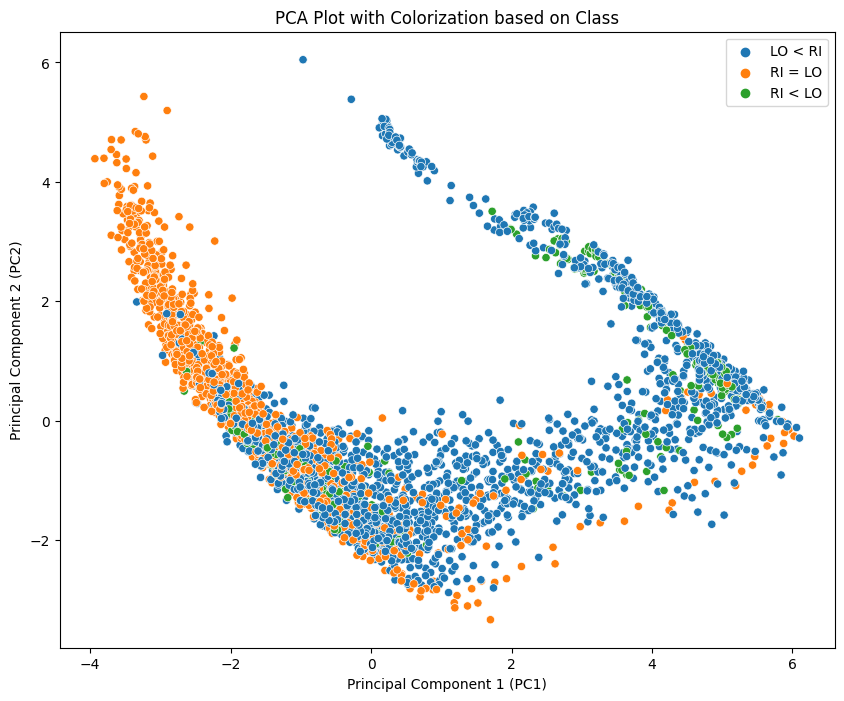

In [48]:
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(vec_embeddings_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = class_RI_LO

# Plot the PCA results with colorization based on the 'class' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

# Visualize with t-SNE

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


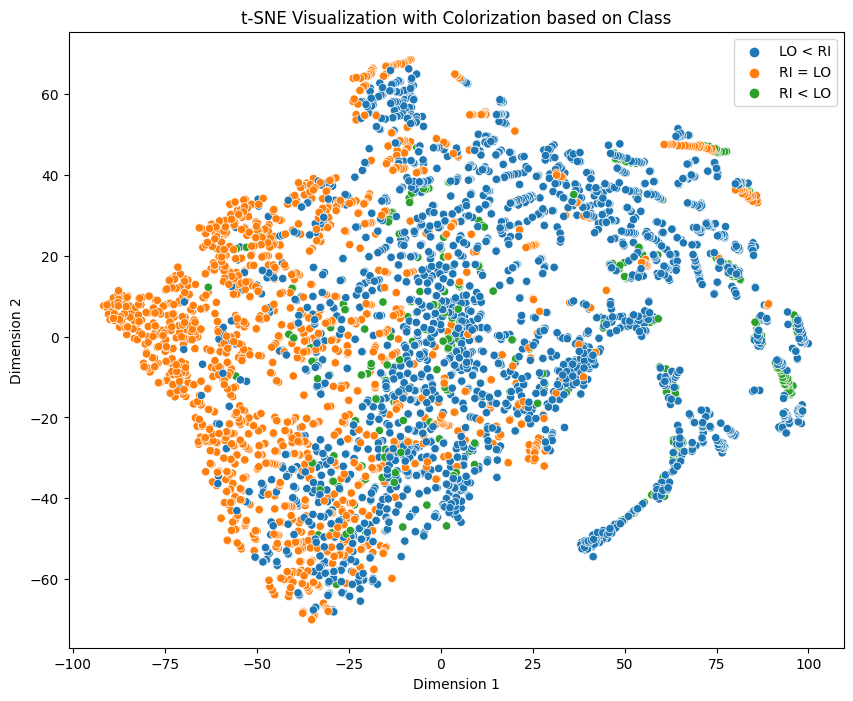

In [55]:
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(vec_embeddings_data)

tsne_df = pd.DataFrame(data=embedded_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df['class'] = class_RI_LO

# Plot the PCA results with colorization based on the 'class' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='class', data=tsne_df,)
plt.title('t-SNE Visualization with Colorization based on Class')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()